In [3]:
# Will reload modeules after this when they change!
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np

In [59]:
# Main metadata
from core_met_v3_20FDR_wb_results import cmv3_wb_ds_name_dict

wholebody_ds_df = pd.DataFrame()
wholebody_ds_df['ds_id'] = cmv3_wb_ds_name_dict.keys()
wholebody_ds_df['polarity'] = ['positive', 'positive', 'positive', 
                               'positive', 'negative', 'negative', 
                               'positive', 'positive', 'positive', 
                               'positive']
wholebody_ds_df['group'] = ['Servier', 'Genentech', 'Genentech',
                           'Servier', 'Servier', 'Servier',
                           'Servier', 'Servier', 'Servier',
                           'Servier']
wholebody_ds_df['analyzer'] = 'FTICR'
wholebody_ds_df['expt_type'] = 'wholebody'
wholebody_ds_df['ds_id_in'] = wholebody_ds_df['ds_id']
wholebody_ds_df['ds_id_out'] = None
wholebody_ds_df['search'] = 'HQ_data_msms'
wholebody_ds_df['name'] = cmv3_wb_ds_name_dict.values()

wholebody_ds_df

,ds_id,polarity,group,analyzer,expt_type,ds_id_in,ds_id_out,search,name
0,2016-09-21_16h07m45s,positive,Servier,FTICR,wholebody,2016-09-21_16h07m45s,None,HQ_data_msms,Technologie_ServierTES-WBrat-vehicle
1,2017-05-17_19h49m04s,positive,Genentech,FTICR,wholebody,2017-05-17_19h49m04s,None,HQ_data_msms,whole body xenograft (1) [RMS norm]
2,2017-05-17_19h50m07s,positive,Genentech,FTICR,wholebody,2017-05-17_19h50m07s,None,HQ_data_msms,wb xenograft trp pathway dosed- rms_corrected
3,2017-05-29_07h28m52s,positive,Servier,FTICR,wholebody,2017-05-29_07h28m52s,None,HQ_data_msms,servier_TT_mouse_wb_fmpts_derivatization_CHCA
4,2017-07-24_19h42m31s,negative,Servier,FTICR,wholebody,2017-07-24_19h42m31s,None,HQ_data_msms,Servier_Ctrl_mouse_wb_lateral_plane_9aa
5,2017-07-26_18h25m14s,negative,Servier,FTICR,wholebody,2017-07-26_18h25m14s,None,HQ_data_msms,Servier_Ctrl_mouse_wb_median_plane_9aa
6,2017-08-03_15h09m06s,positive,Servier,FTICR,wholebody,2017-08-03_15h09m06s,None,HQ_data_msms,Servier_Ctrl_mouse_wb_median_plane_chca
7,2017-08-03_15h09m51s,positive,Servier,FTICR,wholebody,2017-08-03_15h09m51s,None,HQ_data_msms,Servier_Ctrl_mouse_wb_lateral_plane_chca
8,2017-08-11_07h59m58s,positive,Servier,FTICR,wholebody,2017-08-11_07h59m58s,None,HQ_data_msms,Servier_Ctrl_mouse_wb_lateral_plane_DHB
9,2017-08-11_08h01m02s,positive,Servier,FTICR,wholebody,2017-08-11_08h01m02s,None,HQ_data_msms,Servier_Ctrl_mouse_wb_median_plane_DHB


In [15]:
# Copy spotting datasets to beta and run MS1 search
from clone_ds_to_beta import copy_beta

out_dict_list = []
for ds in cmv3_wb_ds_pol_dict.keys():
    x = copy_beta(ds, 'HNaKM', 'core_metabolome_v3')
    out_dict_list.append(x)
    
out_df = pd.DataFrame(out_dict_list)
out_df.to_pickle('dsid_processing/wholebody_cm3_df.pickle')

{'ds_id_in': '2016-09-21_16h07m45s', 'ds_id_out': '2020-05-22_17h31m17s'}
{'ds_id_in': '2017-05-17_19h49m04s', 'ds_id_out': '2020-05-22_17h31m21s'}
{'ds_id_in': '2017-05-17_19h50m07s', 'ds_id_out': '2020-05-22_17h31m24s'}
{'ds_id_in': '2017-05-29_07h28m52s', 'ds_id_out': '2020-05-22_17h31m27s'}
{'ds_id_in': '2017-07-24_19h42m31s', 'ds_id_out': '2020-05-22_17h31m30s'}
{'ds_id_in': '2017-07-26_18h25m14s', 'ds_id_out': '2020-05-22_17h31m33s'}
{'ds_id_in': '2017-08-03_15h09m06s', 'ds_id_out': '2020-05-22_17h31m36s'}
{'ds_id_in': '2017-08-03_15h09m51s', 'ds_id_out': '2020-05-22_17h31m39s'}
{'ds_id_in': '2017-08-11_07h59m58s', 'ds_id_out': '2020-05-22_17h31m43s'}
{'ds_id_in': '2017-08-11_08h01m02s', 'ds_id_out': '2020-05-22_17h31m46s'}


In [24]:
from results_from_metaspace_msms_process import logon_metaspace
from metaspace.sm_annotation_utils import SMInstance

df_list = []
for ms_ds_id in out_df.ds_id_out:
    ds_id_in = list(out_df[out_df.ds_id_out == ms_ds_id].ds_id_in)[0]
    sm = SMInstance(host='https://beta.metaspace2020.eu')
    sm = logon_metaspace(sm)
    ds = sm.dataset(id=ms_ds_id)
    results_df = ds.results(database='core_metabolome_v3').reset_index()
    results_df['ds_id_in'] = ds_id_in
    df_list.append(results_df)

In [29]:
from results_from_metaspace_msms_process import split_data_frame_list
# Filter for compound id list...
ms1_df = pd.concat(df_list)
ms1_df = ms1_df[ms1_df.fdr <=0.2]
ms1_df = ms1_df[['ds_id_in', 'moleculeIds']]
ms1_df = split_data_frame_list(ms1_df, 'moleculeIds')

In [60]:
# Paths to databases and output for next cell
limit_list = []
outname = ''
out_path = 'to_metaspace/wholebody_matched'
polarity = None
expt_pos = 'test_output/exp_positive.pickle'
theo_pos = 'test_output/theo_positive.pickle'
expt_neg = 'test_output/exp_negative.pickle'
theo_neg = 'test_output/theo_negative.pickle'
ref_expt = 'databases/ref_expt_df.pickle'
ref_theo = 'databases/ref_theo_df.pickle'

spectra_positive
spectra_negative
trees

In [61]:
# Generats METASPACE database from Sirius output files
# Need to rerun all of workflow?
from sirius_to_metaspace_db import primary_loop

for ds_id in list(wholebody_ds_df.ds_id):
    limit_list = list(ms1_df[ms1_df.ds_id_in == ds_id].moleculeIds.unique())
    polarity = list(wholebody_ds_df[wholebody_ds_df.ds_id == ds_id].polarity)[0]
    primary_loop(limit_list,
                 ds_id,
                 out_path,
                 polarity,
                 expt_pos,
                 theo_pos,
                 expt_neg,
                 theo_neg,
                 ref_expt,
                 ref_theo
                 )

# Send databases to Vitaly for uploading

2 sirius_output_df (9634, 3)                                                                                                exists  \
0_HMDB0003361_Pyrimidine                            trees/positive_0_HMDB0003361_Pyrimidine/0_HMDB...   
5_HMDB0029713_Thiazole                              trees/positive_5_HMDB0029713_Thiazole/5_HMDB00...   
17_HMDB0001414_Putrescine                           trees/positive_17_HMDB0001414_Putrescine/17_HM...   
18_HMDB0000056_betaAlanine                          trees/positive_18_HMDB0000056_betaAlanine/18_H...   
19_HMDB0000161_LAlanine                             trees/positive_19_HMDB0000161_LAlanine/19_HMDB...   
...                                                                                               ...   
11431_HMDB0058988_CL2045Z8Z11Z14Z1802045Z8Z11Z1...  trees/positive_11431_HMDB0058988_CL2045Z8Z11Z1...   
11432_HMDB0057261_CL1802045Z8Z11Z14Z2045Z8Z11Z1...  trees/positive_11432_HMDB0057261_CL1802045Z8Z1...   
11433_HMDB0059079_CL2045Z8

Correct ionformulas: 
 True    189750
Name: good_mass_calc, dtype: int64
to_metaspace/wholebody_matched2017-05-17_19h50m07s.csv
2 sirius_output_df (9634, 3)                                                                                                exists  \
0_HMDB0003361_Pyrimidine                            trees/positive_0_HMDB0003361_Pyrimidine/0_HMDB...   
5_HMDB0029713_Thiazole                              trees/positive_5_HMDB0029713_Thiazole/5_HMDB00...   
17_HMDB0001414_Putrescine                           trees/positive_17_HMDB0001414_Putrescine/17_HM...   
18_HMDB0000056_betaAlanine                          trees/positive_18_HMDB0000056_betaAlanine/18_H...   
19_HMDB0000161_LAlanine                             trees/positive_19_HMDB0000161_LAlanine/19_HMDB...   
...                                                                                               ...   
11431_HMDB0058988_CL2045Z8Z11Z14Z1802045Z8Z11Z1...  trees/positive_11431_HMDB0058988_CL2045Z8Z11Z1...   
114

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace/wholebody_matched2017-07-24_19h42m31s.csv
2 sirius_output_df (7747, 3)                                                                                                exists  \
19_HMDB0000161_LAlanine                             trees/negative_19_HMDB0000161_LAlanine/19_HMDB...   
20_HMDB0001310_DAlanine                             trees/negative_20_HMDB0001310_DAlanine/20_HMDB...   
25_HMDB0001051_Glyceraldehyde                       trees/negative_25_HMDB0001051_Glyceraldehyde/2...   
38_HMDB0000005_2Ketobutyric_acid                    trees/negative_38_HMDB0000005_2Ketobutyric_aci...   
52_HMDB0001906_2Aminoisobutyric_acid                trees/negative_52_HMDB0001906_2Aminoisobutyric...   
...                                                                                               ...   
11431_HMDB0058988_CL2045Z8Z11Z14Z1802045Z8Z11Z1...  trees/negative_11431_HMDB0058988_CL2045

df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (189784, 15)  1     187788
 22      1412
 38       579
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (189780, 15)
Observed ions: 
 1     187788
22      1412
38       579
0          1
Name: dmass, dtype: int64
4 (189750, 15)
Correct ionformulas: 
 True    189750
Name: good_mass_calc, dtype: int64
to_metaspace/wholebody_matched2017-08-03_15h09m06s.csv
2 sirius_output_df (9634, 3)                                                                                                exists  \
0_HMDB0003361_Pyrimidine                            trees/positive_0_HMDB0003361_Pyrimidine/0_HMDB...   
5_HMDB0029713_Thiazole                              trees/positive_5_HMDB0029713_Thiazole/5_HMDB00...   
17_HMDB0001414_Putrescine                           trees/positive_17_HMDB0001414_Putrescine/17_HM...   
18_HMDB0000056_betaAlanine                          trees/positive_18_HMDB000

df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (189784, 15)  1     187788
 22      1412
 38       579
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (189780, 15)
Observed ions: 
 1     187788
22      1412
38       579
0          1
Name: dmass, dtype: int64
4 (189750, 15)
Correct ionformulas: 
 True    189750
Name: good_mass_calc, dtype: int64
to_metaspace/wholebody_matched2017-08-11_08h01m02s.csv


In [64]:
# Copy spotting datasets to beta:
from clone_ds_to_beta import copy_beta

ori_ds_db = ['2016-09-21_16h07m45s',
             '2017-05-17_19h49m04s',
             '2017-05-17_19h50m07s',
             '2017-05-29_07h28m52s',
             '2017-07-24_19h42m31s',
             '2017-07-26_18h25m14s',
             '2017-08-03_15h09m06s',
             '2017-08-03_15h09m51s',
             '2017-08-11_07h59m58s',
             '2017-08-11_08h01m02s']
out_dict_list = []
for ds in ori_ds_db:
    print(ds)
    x = copy_beta(ds, 'M', ds)
    out_dict_list.append(x)
    
out_df = pd.DataFrame(out_dict_list)
out_df.to_pickle('to_metaspace/wholebody_matched/wholebody_ms2_df.pickle')

2016-09-21_16h07m45s
{'ds_id_in': '2016-09-21_16h07m45s', 'ds_id_out': '2020-05-26_17h57m50s'}
2017-05-17_19h49m04s
{'ds_id_in': '2017-05-17_19h49m04s', 'ds_id_out': '2020-05-26_17h57m53s'}
2017-05-17_19h50m07s
{'ds_id_in': '2017-05-17_19h50m07s', 'ds_id_out': '2020-05-26_17h57m57s'}
2017-05-29_07h28m52s
{'ds_id_in': '2017-05-29_07h28m52s', 'ds_id_out': '2020-05-26_17h58m00s'}
2017-07-24_19h42m31s
{'ds_id_in': '2017-07-24_19h42m31s', 'ds_id_out': '2020-05-26_17h58m04s'}
2017-07-26_18h25m14s
{'ds_id_in': '2017-07-26_18h25m14s', 'ds_id_out': '2020-05-26_17h58m08s'}
2017-08-03_15h09m06s
{'ds_id_in': '2017-08-03_15h09m06s', 'ds_id_out': '2020-05-26_17h58m11s'}
2017-08-03_15h09m51s
{'ds_id_in': '2017-08-03_15h09m51s', 'ds_id_out': '2020-05-26_17h58m15s'}
2017-08-11_07h59m58s
{'ds_id_in': '2017-08-11_07h59m58s', 'ds_id_out': '2020-05-26_17h58m19s'}
2017-08-11_08h01m02s
{'ds_id_in': '2017-08-11_08h01m02s', 'ds_id_out': '2020-05-26_17h58m22s'}


In [ ]:
### Stop

In [67]:
df = wholebody_ds_df.copy(deep=True)

In [68]:
df.update(out_df)

In [70]:
df.to_pickle('to_metaspace/wholebody_matched/wholebody_ms2_df.pickle')

In [5]:
df = pd.read_pickle('to_metaspace/wholebody_matched/wholebody_ms2_df.pickle')

In [6]:
df.head(5)

,ds_id,polarity,group,analyzer,expt_type,ds_id_in,ds_id_out,search,name
0,2016-09-21_16h07m45s,positive,Servier,FTICR,wholebody,2016-09-21_16h07m45s,2020-05-26_17h57m50s,HQ_data_msms,Technologie_ServierTES-WBrat-vehicle
1,2017-05-17_19h49m04s,positive,Genentech,FTICR,wholebody,2017-05-17_19h49m04s,2020-05-26_17h57m53s,HQ_data_msms,whole body xenograft (1) [RMS norm]
2,2017-05-17_19h50m07s,positive,Genentech,FTICR,wholebody,2017-05-17_19h50m07s,2020-05-26_17h57m57s,HQ_data_msms,wb xenograft trp pathway dosed- rms_corrected
3,2017-05-29_07h28m52s,positive,Servier,FTICR,wholebody,2017-05-29_07h28m52s,2020-05-26_17h58m00s,HQ_data_msms,servier_TT_mouse_wb_fmpts_derivatization_CHCA
4,2017-07-24_19h42m31s,negative,Servier,FTICR,wholebody,2017-07-24_19h42m31s,2020-05-26_17h58m04s,HQ_data_msms,Servier_Ctrl_mouse_wb_lateral_plane_9aa


In [13]:
# Weird error, getting index and value back from series with one entry?
ds_db_dict = dict(zip(list(df.ds_id_in), list(df.ds_id_in)))
ds_ms_dict = dict(zip(list(df.ds_id_in), list(df.ds_id_out)))

In [14]:
from results_from_metaspace_msms_process import reporting_loop

for ori_ds, db in ds_db_dict.items():
    ds_ms = ds_ms_dict[ori_ds]
    print(ori_ds, db, ds_ms)
    
    reporting_loop(ori_ds,
                   db,
                   ds_ms,
                   'METASPACE_img_df_2020_May_26_wholebody_arr/',
                   parent_and_fragment_req=True,
                   fdr_max=0.5,
                   save_image=False)

2016-09-21_16h07m45s 2016-09-21_16h07m45s 2020-05-26_17h57m50s
2020-05-26_17h57m50s  Counter:  62
2017-05-17_19h49m04s 2017-05-17_19h49m04s 2020-05-26_17h57m53s
2020-05-26_17h57m53s  Counter:  1968
2017-05-17_19h50m07s 2017-05-17_19h50m07s 2020-05-26_17h57m57s
2020-05-26_17h57m57s  Counter:  2622
2017-05-29_07h28m52s 2017-05-29_07h28m52s 2020-05-26_17h58m00s
2020-05-26_17h58m00s  Counter:  230
2017-07-24_19h42m31s 2017-07-24_19h42m31s 2020-05-26_17h58m04s
2020-05-26_17h58m04s  Counter:  198
2017-07-26_18h25m14s 2017-07-26_18h25m14s 2020-05-26_17h58m08s
2020-05-26_17h58m08s  Counter:  410
2017-08-03_15h09m06s 2017-08-03_15h09m06s 2020-05-26_17h58m11s
2020-05-26_17h58m11s  Counter:  837
2017-08-03_15h09m51s 2017-08-03_15h09m51s 2020-05-26_17h58m15s
2020-05-26_17h58m15s  Counter:  526
2017-08-11_07h59m58s 2017-08-11_07h59m58s 2020-05-26_17h58m19s
2020-05-26_17h58m19s  Counter:  847
2017-08-11_08h01m02s 2017-08-11_08h01m02s 2020-05-26_17h58m22s
2020-05-26_17h58m22s  Counter:  957


In [16]:
from matplotlib import pyplot as plt

import pickle

def load_arr_pickle(path):
    # Loads pickled np.array
    with open(path, 'rb') as f:
        return pickle.load(f)

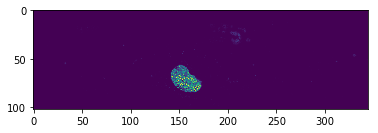

In [18]:
plt.imshow(load_arr_pickle('METASPACE_img_df_2020_May_26_wholebody_arr/2020-05-26_17h57m53s/by_id/HMDB0000055/C12H22O11Na_P.pickle'))